<a href="https://colab.research.google.com/github/jocker1854/Machine-Learning-Projects/blob/main/Project_7_LoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-prediction-dataset


In [2]:
ls /kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv

loan_approval_dataset.csv


In [3]:
path = '/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
base_df = pd.read_csv(path)

In [6]:
df = base_df.copy()

In [9]:
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns

In [10]:
numerical_features

Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value',
       ' bank_asset_value'],
      dtype='object')

In [11]:
df.drop('loan_id', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [18]:
df.rename(columns=lambda x: x.strip(), inplace=True)

array([[<Axes: title={'center': 'no_of_dependents'}>,
        <Axes: title={'center': 'income_annum'}>,
        <Axes: title={'center': 'loan_amount'}>],
       [<Axes: title={'center': 'loan_term'}>,
        <Axes: title={'center': 'cibil_score'}>,
        <Axes: title={'center': 'residential_assets_value'}>],
       [<Axes: title={'center': 'commercial_assets_value'}>,
        <Axes: title={'center': 'luxury_assets_value'}>,
        <Axes: title={'center': 'bank_asset_value'}>]], dtype=object)

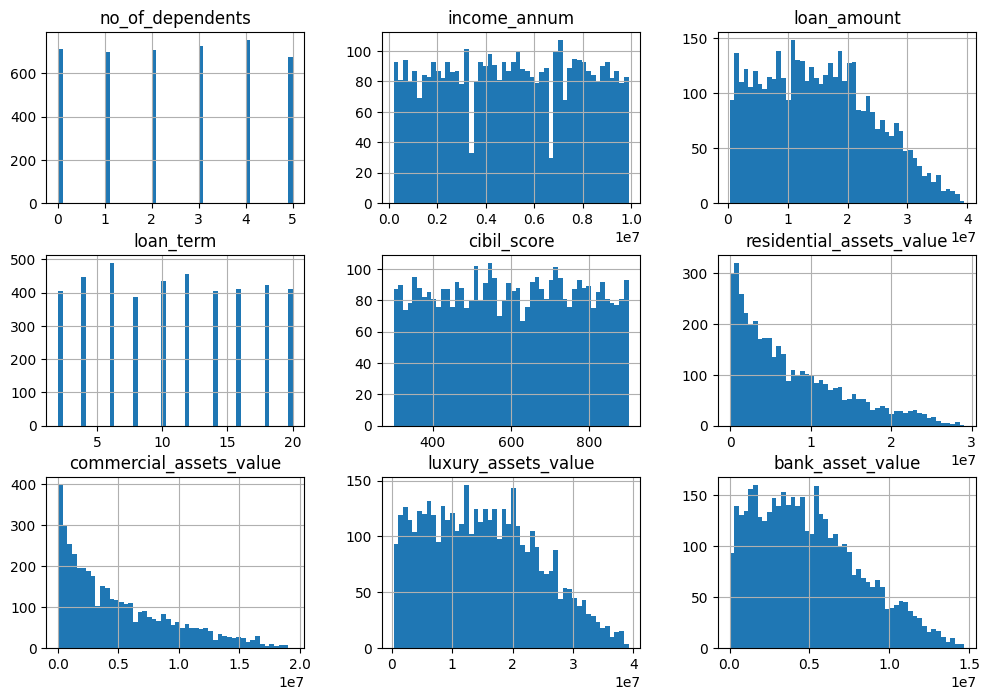

In [19]:
df.hist(bins=50, figsize=(12, 8))

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [20]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [23]:
# Encode categorical columns
label_encoders = {}
for col in ['education', 'self_employed', 'loan_status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

,count
self_employed,
1,2150
0,2119


In [26]:
# Features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [27]:
# Scale numerical features (optional but good for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9789227166276346

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

